In [25]:
import mlrose_hiive
from sklearn.metrics import roc_auc_score
import numpy as np
from functions import preprocess_titanic
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import time

In [51]:
def plot_loss_per_iteration_curve(data):
    tmp = data["RHC"]
    plt.plot(range(len(tmp)), tmp[:,0], label = "RHC")
    plt.annotate("Iteration: {} Loss: {}".format(range(len(tmp))[-1], np.round(tmp[:,0][-1],3)),xy=(range(len(tmp))[-1],tmp[:,0][-1]))
    tmp = data["SA"]
    plt.plot(range(len(tmp)), tmp[:,0], label = "SA")
    plt.annotate("Iteration: {} Loss: {}".format(range(len(tmp))[-1], np.round(tmp[:,0][-1],3)),xy=(range(len(tmp))[-1],tmp[:,0][-1]))
    tmp = data["GA"]
    plt.plot(range(len(tmp)), tmp[:,0], label = "GA")
    plt.annotate("Iteration: {} Loss: {}".format(range(len(tmp))[-1], np.round(tmp[:,0][-1],3)),xy=(range(len(tmp))[-1],tmp[:,0][-1]))
    tmp = data["GD"]
    plt.plot(range(len(tmp)), tmp[:,0], label = "GD")
    plt.annotate("Iteration: {} Loss: {}".format(range(len(tmp))[-1], np.round(tmp[:,0][-1],3)),xy=(range(len(tmp))[-1],tmp[:,0][-1]))
    plt.title("Loss / Iteration For NN Optimization") 
    plt.legend() 
    plt.show()

In [41]:
def plot_fitness_per_alg(data):
    x_item = []
    y_item = []
    for i in ["SA", "GA", "RHC", "GD"]:
        x_item.append(i)
        y_item.append(data[f"{i}_best_fitness"])
    bar = plt.bar(x_item, y_item)
    plt.title("Fitness / Algorithm for NN Optimization")
    plt.bar_label(bar)
    plt.show()

In [42]:
def plot_wall_clock_per_alg(data):
    x_item = []
    y_item = []
    for i in ["SA", "GA", "RHC", "GD"]:
        x_item.append(i)
        y_item.append(data[f"{i}_wall_clock"])
    bar = plt.bar(x_item, y_item)
    plt.title("Wall Clock / Algorithm for NN Optimization")
    plt.bar_label(bar)
    plt.show()

In [29]:
data = {}

In [30]:
X_train, X_test, y_train, y_test = preprocess_titanic()

In [31]:
### RHC
nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes=[25], activation='relu', algorithm='random_hill_climb', max_iters=10000, bias=True, is_classifier=True, learning_rate=0.001, early_stopping=True, restarts=10, max_attempts=100, random_state=42, curve=True)
start_time = time.time()
nn_model.fit(X_train, y_train)
data["RHC_wall_clock"] = time.time() - start_time

In [32]:
z = nn_model.predict(X_test)
scores = roc_auc_score(np.array(y_test), z)
print("scores:", scores)
print("loss:", nn_model.loss)
data["RHC"] = nn_model.fitness_curve
data["RHC_best_fitness"] = scores


scores: 0.7232542819499341
loss: 0.6105160030591237


In [33]:
### SA
nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes=[25], activation='relu', algorithm='simulated_annealing', max_iters=100000, bias=True, is_classifier=True, learning_rate=0.001, early_stopping=True, schedule=mlrose_hiive.ExpDecay(exp_const=0.05), max_attempts=100, random_state=42, curve=True)
start_time = time.time()
nn_model.fit(X_train, y_train)
data["SA_wall_clock"] = time.time() - start_time

In [34]:
z = nn_model.predict(X_test)
scores = roc_auc_score(np.array(y_test), z)
print("scores:", scores)
print("loss:", nn_model.loss)
data["SA"] = nn_model.fitness_curve
data["SA_best_fitness"] = scores

scores: 0.7214097496706193
loss: 0.6011552021898774


In [35]:
### GA
nn_model = mlrose_hiive.NeuralNetwork(hidden_nodes=[25], activation='relu', algorithm='genetic_alg', pop_size=200, max_iters=1000, bias=True, is_classifier=True, learning_rate=0.001, early_stopping=True, max_attempts=100, random_state=42, curve=True)
start_time = time.time()
nn_model.fit(X_train, y_train)
data["GA_wall_clock"] = time.time() - start_time

In [36]:
z = nn_model.predict(X_test)
scores = roc_auc_score(np.array(y_test), z)
print("scores:", scores)
print("loss:", nn_model.loss)
data["GA"] = nn_model.fitness_curve
data["GA_best_fitness"] = scores

scores: 0.7489459815546773
loss: 6.277265477879953


In [37]:
estimator = MLPClassifier(random_state=42, hidden_layer_sizes=25, solver="adam", batch_size=64, early_stopping=True)
start_time = time.time()
estimator.fit(np.array(X_train), np.array(y_train))
data["GD_wall_clock"] = time.time() - start_time

In [38]:
z = estimator.predict(X_test)
scores = roc_auc_score(np.array(y_test), z)
print("scores:", scores)
print("loss:", np.min(estimator.loss_curve_))
data["GD"] = np.array([[x,y] for x,y in zip(estimator.loss_curve_, estimator.loss_curve_)])
data["GD_best_fitness"] = scores

scores: 0.7592555994729908
loss: 0.9287650732916239


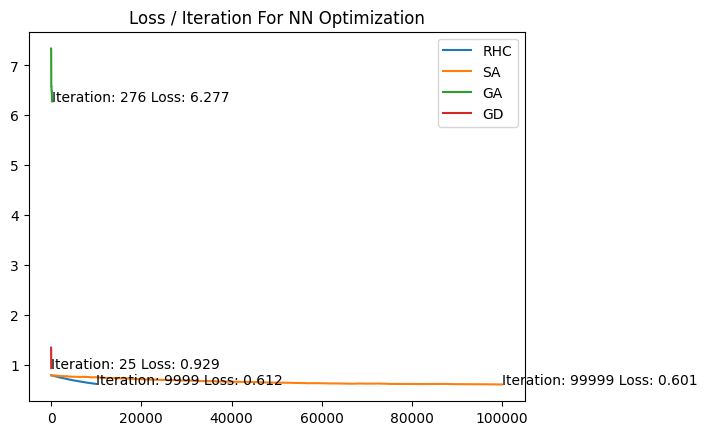

In [52]:
plot_loss_per_iteration_curve(data)

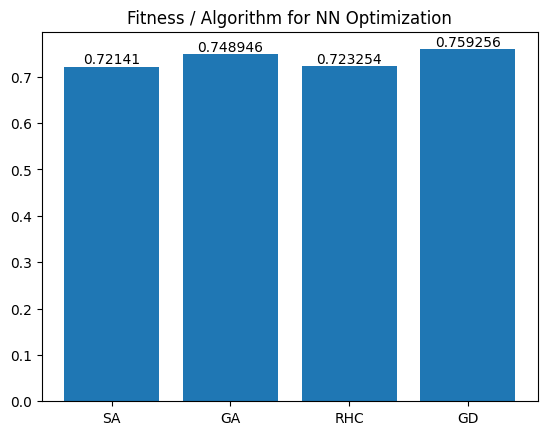

In [43]:
plot_fitness_per_alg(data)

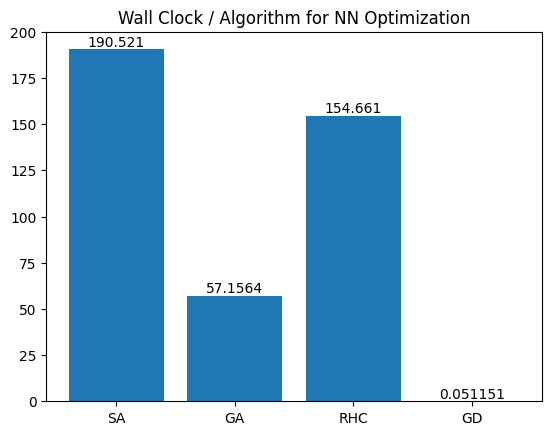

In [44]:
plot_wall_clock_per_alg(data)